Extract mel-spectrogram from audio

In [1]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
import matplotlib.pyplot as plt
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input


Find graphic specs

In [2]:
def load_data(dir_path):
   X = []
   y = []
   labels = ['PD', 'HC']
   for label in labels:
      path = os.path.join(dir_path, label)
      class_num = labels.index(label)
      for img in os.listdir(path):
         try:
               img_arr = img_to_array(load_img(os.path.join(path, img), target_size=(640, 480)))  # Convert image to array
               X.append(preprocess_input(img_arr))  # Preprocess the image using VGG16's preprocess_input method
               y.append(class_num)
         except Exception as e:
               print(e)
   return np.array(X), np.array(y)

In [3]:

X, y = load_data('./plots/')
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load VGG16 model, without the top layer (classification layer)
vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(640, 480, 3))

# Freeze the layers of VGG16 model to retain their pre-trained weights
for layer in vgg_model.layers:
   layer.trainable = False

# Add custom layers
x = Flatten()(vgg_model.output)
x = Dense(1024, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

# Define the new model
model = Model(inputs=vgg_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), 
            loss='binary_crossentropy', 
            metrics=['accuracy', Precision(), Recall()])


cannot identify image file <_io.BytesIO object at 0x29ce92180>


train

In [4]:
# Add custom layers
x = Flatten()(vgg_model.output)
x = Dense(1024, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)

# Define the new model
model = Model(inputs=vgg_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), 
            loss='binary_crossentropy', 
            metrics=['accuracy', Precision(), Recall()])

In [5]:
results = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=12,
        batch_size=32)

Epoch 1/12
2/2 [==============================] - 22s 7s/step - loss: 8.0500 - accuracy: 0.6000 - precision_1: 0.5294 - recall_1: 0.5294 - val_loss: 364.3796 - val_accuracy: 0.4545 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/12
2/2 [==============================] - 20s 7s/step - loss: 176.6545 - accuracy: 0.6000 - precision_1: 1.0000 - recall_1: 0.0588 - val_loss: 23.9135 - val_accuracy: 0.9091 - val_precision_1: 0.8571 - val_recall_1: 1.0000
Epoch 3/12
2/2 [==============================] - 20s 7s/step - loss: 30.3757 - accuracy: 0.8250 - precision_1: 0.7083 - recall_1: 1.0000 - val_loss: 35.9194 - val_accuracy: 0.8182 - val_precision_1: 0.7500 - val_recall_1: 1.0000
Epoch 4/12
2/2 [==============================] - 20s 7s/step - loss: 14.1456 - accuracy: 0.8500 - precision_1: 0.7391 - recall_1: 1.0000 - val_loss: 34.6098 - val_accuracy: 0.7273 - val_precision_1: 1.0000 - val_recall_1: 0.5000
Epoch 5/12
2/2 [==============================] - 20s 7s/step - loss: 1

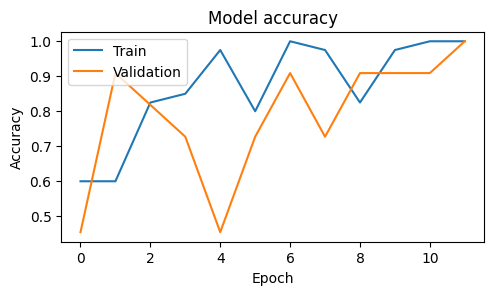

In [6]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

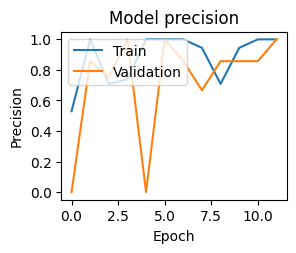

In [8]:
# Plot training & validation precision values
plt.subplot(2, 2, 2)
plt.plot(results.history['precision_1'])
plt.plot(results.history['val_precision_1'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

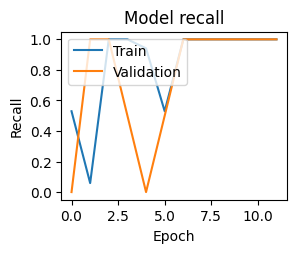

In [9]:
# Plot training & validation recall values
plt.subplot(2, 2, 3)
plt.plot(results.history['recall_1'])
plt.plot(results.history['val_recall_1'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

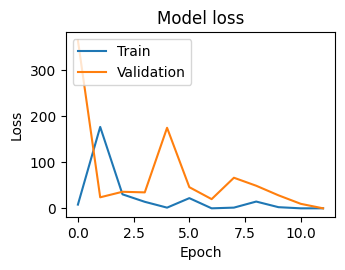

In [11]:
# Plot training & validation loss values
plt.subplot(2, 2, 4)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()